# K-means Clustering
## 1. Load a dataset suitable for clustering (e.g., customer segmentation dataset).
## 2. Implement k-means clustering using scikit-learn.
## 3. Determine the optimal number of clusters using the elbow method and visualize the clusters.

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Mall_Customers dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')

## Display basic information about the dataset

In [3]:
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
print("\nBasic statistics:")
df.describe()


Basic statistics:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Preprocessing

In [6]:
# Check for missing values
print("\nMissing values:")
df.isnull().sum()


Missing values:


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# Select features for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features)

## Find Optimal Number of Clusters using Elbow Method

In [8]:
max_clusters = 10
inertias = []
silhouette_scores = []

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

C:\Users\Rishi Thakur\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rishi Thakur\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rishi Thakur\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rishi Thakur\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have

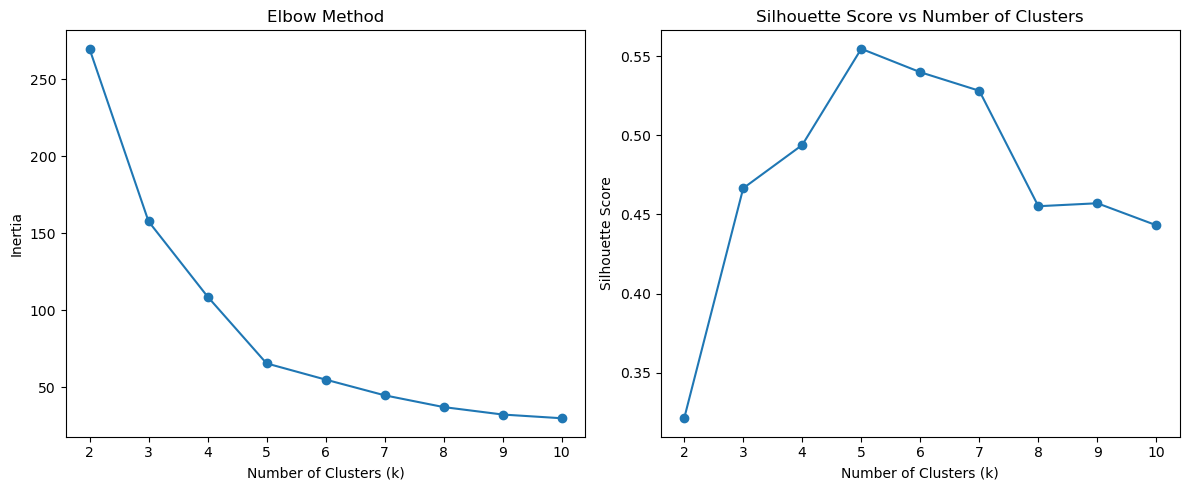

In [9]:
# Visualize Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')

plt.tight_layout()
plt.show()

## Train the Final Model with Optimal Clusters

In [10]:
optimal_clusters = 5  # Based on elbow method
final_model = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df['Cluster'] = final_model.fit_predict(X_scaled)

C:\Users\Rishi Thakur\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


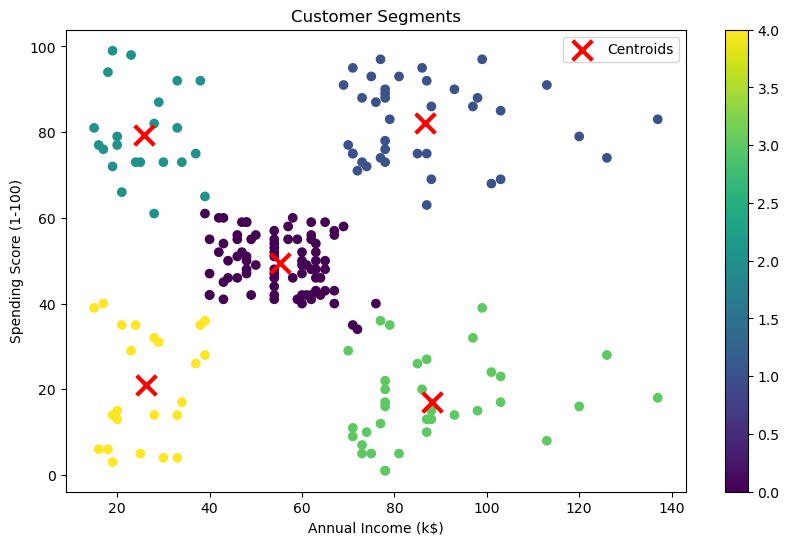

In [11]:
# Visualize the Results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                     c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
centers = scaler.inverse_transform(final_model.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidth=3, label='Centroids')
plt.colorbar(scatter)
plt.legend()
plt.show()

## Analyze Cluster Characteristics


Cluster Sizes:
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

Cluster Characteristics:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043

Detailed Cluster Analysis:
           Age  Gender  Annual Income (k$)  Spending Score (1-100)
Cluster                                                           
0        42.72  Female               55.30                   49.52
1        32.69  Female               86.54                   82.13
2        25.27  Female               25.73                   79.36
3        41.11    Male               88.20                   17.11
4        45.22  Female               26.30                   20.91


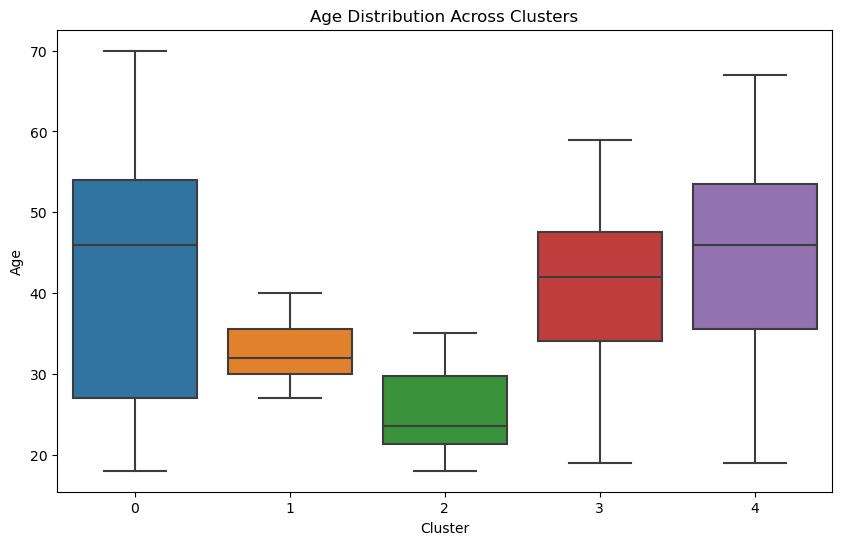

In [12]:
print("\nCluster Sizes:")
print(df['Cluster'].value_counts())

print("\nCluster Characteristics:")
cluster_stats = df.groupby('Cluster')[features].mean()
print(cluster_stats)

# Additional analysis including age and gender
cluster_analysis = df.groupby('Cluster').agg({'Age': 'mean','Gender': lambda x: x.value_counts().index[0],
                                              'Annual Income (k$)': 'mean','Spending Score (1-100)': 'mean'}).round(2)

print("\nDetailed Cluster Analysis:")
print(cluster_analysis)

# Visualize age distribution across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=df)
plt.title('Age Distribution Across Clusters')
plt.show()